In [217]:
import pandas as pd 
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict,cross_validate
from sklearn.metrics import confusion_matrix,consensus_score,classification_report,ConfusionMatrixDisplay
from scipy.stats import chi2


In [139]:
data=pd.read_csv('drug200.csv')
data.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [140]:
data.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [142]:
data['Sex'].value_counts()
data['BP'].value_counts()


HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

C:\Users\anaes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

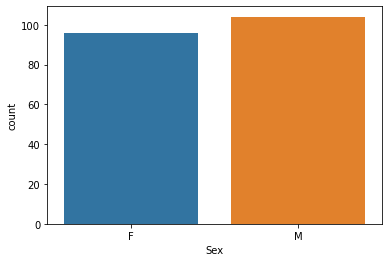

In [143]:
sns.countplot(data['Sex'])

C:\Users\anaes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BP', ylabel='count'>

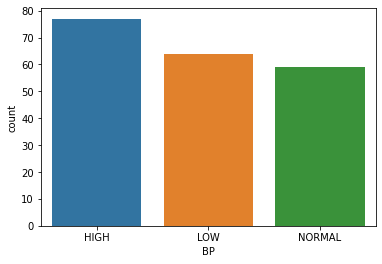

In [144]:
sns.countplot(data['BP'])


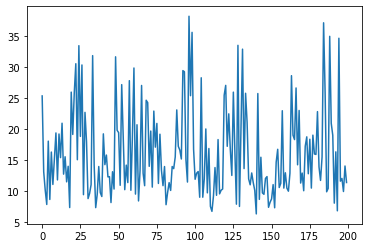

In [145]:
plt.plot(data['Na_to_K'])

C:\Users\anaes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

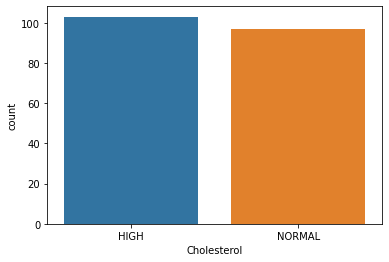

In [146]:
sns.countplot(data['Cholesterol'])


C:\Users\anaes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Drug', ylabel='count'>

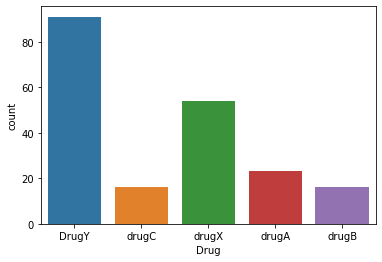

In [147]:
sns.countplot(data['Drug'])


In [148]:
data['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [149]:
data['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [150]:
data['Drug']=data['Drug'].map({'DrugY':1,'drugX':2,'drugA':3,'drugC':4,'drugB':5})

In [151]:
data['Cholesterol']=data['Cholesterol'].map({'HIGH':1,'NORMAL':2})

In [152]:
data['BP']=data['BP'].map({'HIGH':1,'LOW':2,'NORMAL':3})

In [153]:
data['Sex']=data['Sex'].map({'F':0,'M':1})


## X_Y

In [158]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

# SCALE

In [160]:
scale=StandardScaler()
scale_fit=scale.fit(x,y)
x=scale_fit.transform(x) 

In [161]:
x_trin,x_test,y_train,y_test=train_test_split(scale_tr,y,test_size=0.2,random_state=400,shuffle=True)

# Model

In [205]:
kfold=KFold(n_splits=6,random_state=41,shuffle=True)
model=LogisticRegression(multi_class='multinomial',solver='newton-cg')
result=cross_val_score(model,scale_tr,y,cv=kfold)
cv_results = cross_validate(model, scale_tr, y, cv=5, return_train_score=True)
predictions = cross_val_predict(model, scale_tr, y, cv=5)

model.fit(scale_tr,y)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [207]:
cv_results

{'fit_time': array([0.01564002, 0.01603365, 0.        , 0.01562476, 0.        ]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.925, 0.95 , 0.975, 0.85 , 0.95 ]),
 'train_score': array([0.9625 , 0.96875, 0.95625, 0.975  , 0.95   ])}

In [209]:
predictions

array([1, 1, 4, 2, 1, 2, 1, 4, 1, 1, 4, 1, 1, 1, 2, 3, 2, 3, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 5, 2, 1, 2, 2, 3, 1, 2, 2, 1, 5, 2, 2,
       2, 2, 3, 4, 1, 1, 1, 2, 1, 1, 5, 1, 5, 1, 2, 1, 1, 3, 1, 2, 5, 1,
       3, 2, 1, 1, 5, 1, 2, 1, 1, 1, 3, 1, 3, 2, 5, 2, 4, 3, 4, 5, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 4, 2, 1, 2, 2, 1, 5, 1,
       3, 2, 2, 2, 2, 1, 2, 2, 3, 1, 1, 1, 1, 1, 5, 1, 5, 2, 1, 2, 1, 1,
       1, 1, 1, 2, 3, 3, 3, 2, 3, 1, 5, 5, 3, 2, 2, 3, 2, 4, 3, 5, 2, 1,
       1, 4, 3, 1, 4, 2, 2, 5, 2, 1, 1, 1, 1, 2, 1, 3, 2, 2, 2, 1, 3, 5,
       3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 5, 3, 1, 1, 1, 3, 1, 4, 1, 4, 4, 2,
       2, 2], dtype=int64)

In [213]:
print(classification_report(predictions,y))

              precision    recall  f1-score   support

           1       0.92      0.94      0.93        89
           2       0.94      0.94      0.94        54
           3       1.00      0.88      0.94        26
           4       0.88      1.00      0.93        14
           5       0.88      0.82      0.85        17

    accuracy                           0.93       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.93      0.93      0.93       200



In [198]:
result

array([0.94117647, 0.91176471, 0.96969697, 0.90909091, 0.90909091,
       0.96969697])

In [195]:
model.coef_.flatten() 

array([-0.00931349,  0.16209522,  0.83719828,  0.36363933,  4.54776504,
       -0.09601399, -0.12825335,  2.81126913,  1.29637437, -1.39120728,
       -1.02130006,  0.16900376, -2.25452378, -0.36675332, -1.45418299,
       -0.31852111,  0.03192228,  0.44237484, -1.31202137, -1.13557677,
        1.44514865, -0.23476791, -1.83631847,  0.018761  , -0.566798  ])

In [166]:
log_likelihood_fit = model.score(scale_tr, y)  
null_model_probs = np.full_like(y, 1 / len(np.unique(y)), dtype=float)
log_likelihood_null = np.sum(np.log(null_model_probs))

chi = 2 * (log_likelihood_fit - log_likelihood_null)

df = model.coef_.shape[1] - 1
p_value = chi2.sf(chi, df)

print(f"Log-likelihood (null model): {log_likelihood_null}")
print(f"Log-likelihood (fitted model): {log_likelihood_fit}")
print(f"Chi-squared statistic: {chi}")
print(f"P-value: {p_value}")

Log-likelihood (null model): -321.88758248681995
Log-likelihood (fitted model): 0.955
Chi-squared statistic: 645.6851649736399
P-value: 2.002543029384618e-138


In [170]:
y_train_predict=model.predict(x_trin)
y_train_predict

array([1, 1, 1, 1, 1, 2, 3, 1, 3, 1, 1, 2, 1, 4, 3, 1, 2, 1, 2, 1, 5, 1,
       2, 3, 1, 2, 2, 1, 4, 4, 3, 1, 2, 3, 2, 3, 1, 2, 3, 1, 5, 2, 2, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 4, 5, 1, 2, 3, 3, 3, 2, 1, 1, 3,
       1, 4, 2, 2, 1, 3, 5, 1, 1, 1, 5, 1, 1, 1, 1, 2, 4, 1, 3, 2, 2, 1,
       4, 1, 4, 2, 1, 1, 3, 2, 1, 5, 1, 5, 1, 2, 2, 1, 1, 3, 3, 2, 2, 1,
       2, 1, 1, 1, 1, 4, 1, 5, 3, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 3,
       5, 1, 1, 5, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 4, 2, 5, 4, 2, 3, 1, 5,
       1, 5, 3, 1, 1, 1], dtype=int64)

In [171]:
y_train

array([1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 2, 1, 4, 3, 1, 2, 1, 2, 1, 5, 1,
       2, 3, 1, 2, 2, 1, 4, 4, 3, 1, 2, 3, 2, 3, 1, 2, 3, 1, 5, 2, 2, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 4, 5, 1, 2, 3, 3, 3, 2, 1, 2, 5,
       1, 4, 2, 2, 1, 3, 5, 1, 1, 1, 5, 1, 1, 1, 1, 1, 4, 1, 3, 2, 2, 1,
       4, 1, 4, 2, 1, 1, 3, 2, 1, 5, 1, 5, 1, 2, 2, 1, 1, 3, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 4, 1, 5, 3, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 3,
       5, 1, 1, 5, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 4, 2, 5, 4, 2, 3, 1, 5,
       1, 5, 3, 1, 1, 1], dtype=int64)

In [215]:
cm=confusion_matrix(y_train,y_train_predict)
cm

array([[71,  3,  1,  0,  0],
       [ 2, 39,  0,  0,  0],
       [ 0,  0, 19,  0,  0],
       [ 0,  0,  0, 11,  0],
       [ 0,  0,  1,  0, 13]], dtype=int64)

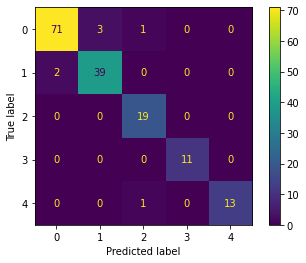

In [223]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [176]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           1       0.97      0.95      0.96        75
           2       0.93      0.95      0.94        41
           3       0.90      1.00      0.95        19
           4       1.00      1.00      1.00        11
           5       1.00      0.93      0.96        14

    accuracy                           0.96       160
   macro avg       0.96      0.97      0.96       160
weighted avg       0.96      0.96      0.96       160



In [178]:
y_test_predict=model.predict(x_test)
y_test_predict

array([1, 2, 1, 1, 1, 1, 2, 4, 1, 1, 4, 2, 1, 2, 1, 1, 5, 2, 2, 3, 3, 2,
       2, 5, 1, 1, 2, 2, 3, 4, 4, 1, 5, 2, 1, 3, 2, 2, 1, 1], dtype=int64)

In [225]:
cm2=confusion_matrix(y_test,y_test_predict)
cm2

array([[15,  0,  0,  0,  1],
       [ 0, 13,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 1,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  2]], dtype=int64)

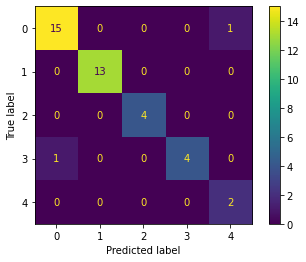

In [227]:
ConfusionMatrixDisplay(cm2).plot()
plt.show()

In [184]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           1       0.94      0.94      0.94        16
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         4
           4       1.00      0.80      0.89         5
           5       0.67      1.00      0.80         2

    accuracy                           0.95        40
   macro avg       0.92      0.95      0.93        40
weighted avg       0.96      0.95      0.95        40

